### Import dependencies

In [1]:
import polars_bio as pb
import pandas as pd
from polars_bio.range_viz import visualize_intervals

INFO:polars_bio:Creating BioSessionContext


### Sample data

In [2]:
df1 = pd.DataFrame(
    [["chr1", 1, 5], ["chr1", 3, 8], ["chr1", 8, 10], ["chr1", 12, 14]],
    columns=["chrom", "start", "end"],
)

df2 = pd.DataFrame(
    [["chr1", 4, 8], ["chr1", 10, 11]], columns=["chrom", "start", "end"]
)

### Overlap

In [3]:
overlapping_intervals = pb.overlap(df1, df2, output_type="pandas.DataFrame")

INFO:polars_bio.operation:Running Overlap operation with algorithm Coitrees and 1 thread(s)...


In [4]:
display(overlapping_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2
0,chr1,1,5,chr1,4,8
1,chr1,3,8,chr1,4,8


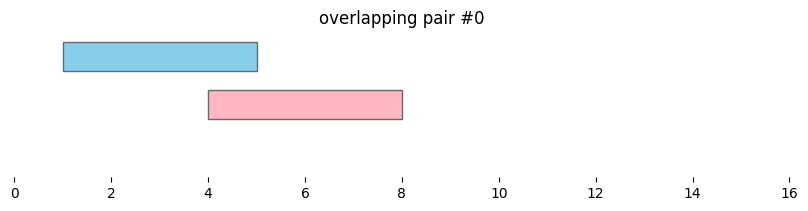

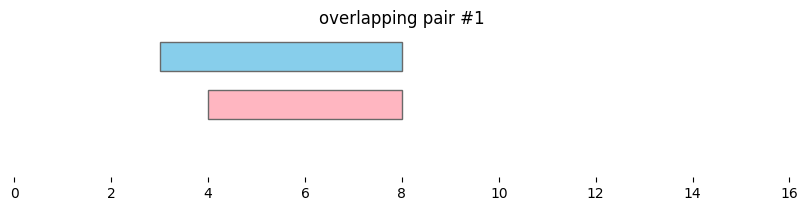

In [5]:
visualize_intervals(overlapping_intervals)

### Nearest

In [6]:
nearest_intervals = pb.nearest(df1, df2, output_type="pandas.DataFrame")

INFO:polars_bio.operation:Running Nearest operation with algorithm Coitrees and 1 thread(s)...


In [7]:
display(nearest_intervals)

,chrom_1,start_1,end_1,chrom_2,start_2,end_2,distance
0,chr1,1,5,chr1,4,8,0
1,chr1,3,8,chr1,4,8,0
2,chr1,8,10,chr1,4,8,0
3,chr1,12,14,chr1,10,11,1


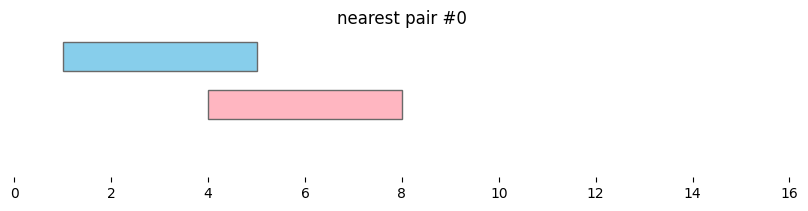

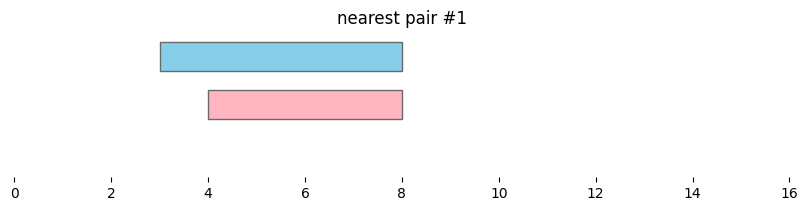

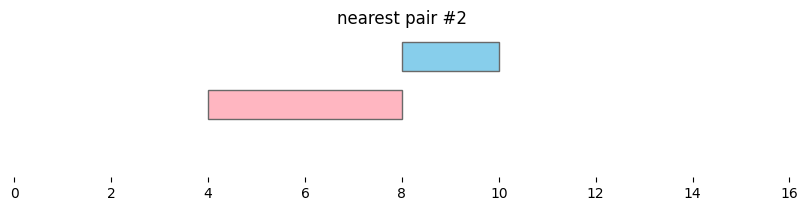

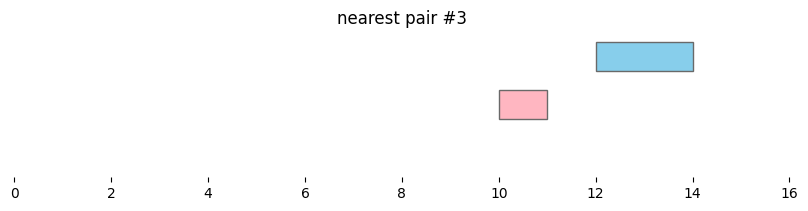

In [8]:
visualize_intervals(nearest_intervals, "nearest pair")